In [20]:
from sklearn.datasets.samples_generator import make_circles
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import numpy as np
from ipywidgets import interact, fixed
from sklearn.datasets.samples_generator import make_blobs


In [21]:
def plot_svc_decision_function(model,ax = None, plot_support= True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    #Create a grid to evaluate the Model
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(),Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    #plot decision boundary and margins
    ax.contour(X,Y,P, colors = 'k', levels = [-1,0,1],alpha = 0.5,linestyles=['--','-','--'])
    #plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=300,linewidth = 1,facecolors = 'none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

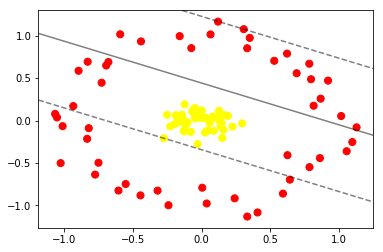

In [22]:
X,y = make_circles(100,factor = .1, noise = .1)
clf = SVC(kernel='linear').fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap = 'autumn')
plot_svc_decision_function(clf,plot_support=False);

In [23]:
r = np.exp(-(X**2).sum(1))

In [24]:
from mpl_toolkits import mplot3d
def plot_3D(elev = 30, azim = 30,X=X,y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    
interact(plot_3D,elev = [-90,90],azip = (-180,180),X=fixed(X),y = fixed(y));

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

In [25]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

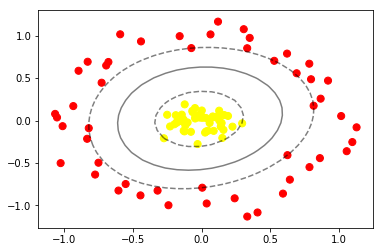

In [26]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

In [27]:
# Tuning the SVM

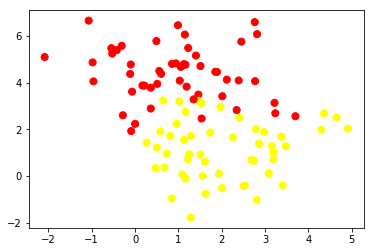

In [28]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

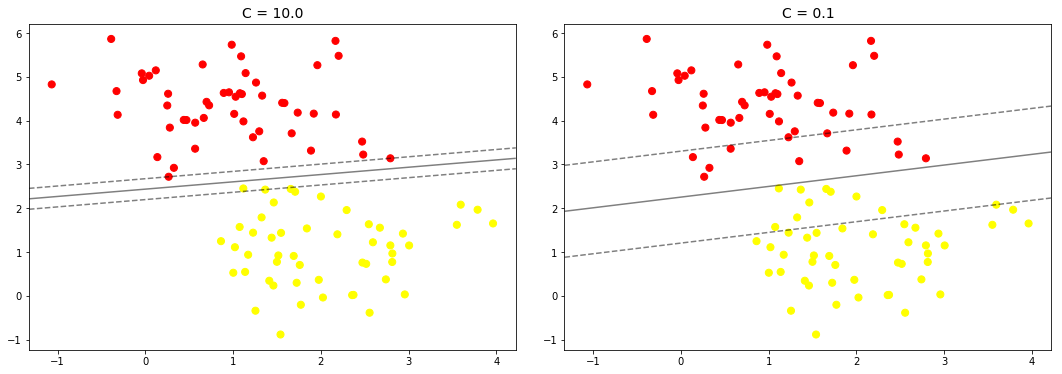

In [34]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)